In [17]:
#Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Change the directory to the path where you have all your input files
%cd /content/drive/My Drive/NITISH

#Below command shows you all thee files present in your current directory
#!ls

/content/drive/My Drive/NITISH


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('Google_train_data.csv')
data.head()

In [ ]:
data.info()

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [18]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 16s - loss: 0.0362 - 16s/epoch - 455ms/step
Epoch 2/20
35/35 - 9s - loss: 0.0110 - 9s/epoch - 251ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0098 - 7s/epoch - 203ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0083 - 8s/epoch - 216ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0079 - 7s/epoch - 189ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0090 - 9s/epoch - 267ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0073 - 6s/epoch - 182ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0067 - 8s/epoch - 221ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0064 - 7s/epoch - 189ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0073 - 8s/epoch - 226ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 191ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0055 - 8s/epoch - 221ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 194ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0062 - 7s/epoch - 210ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 202ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0049 - 7s/epoch - 200ms/step
Epoch 17/20
35/

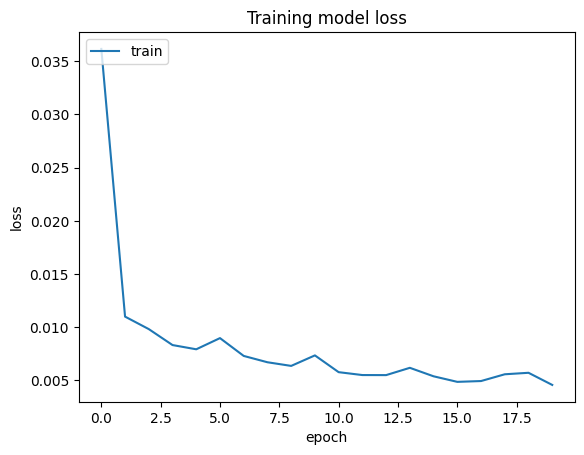

In [19]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [20]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [21]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 7s 60ms/step


array([[1.1778435],
       [1.1823024],
       [1.195125 ],
       [1.2134454],
       [1.2270092],
       [1.2242005],
       [1.2063706],
       [1.1837983],
       [1.1701015],
       [1.1678814],
       [1.1631643],
       [1.1535982],
       [1.1449083],
       [1.1368716],
       [1.1365472],
       [1.1432528],
       [1.1644465],
       [1.196406 ],
       [1.231364 ],
       [1.2639753],
       [1.273094 ],
       [1.2629155],
       [1.2345194],
       [1.1987673],
       [1.169461 ],
       [1.155857 ],
       [1.1571679],
       [1.1626906],
       [1.1598115],
       [1.150914 ],
       [1.1393406],
       [1.1253457],
       [1.1039735],
       [1.0776557],
       [1.0678933],
       [1.0805335],
       [1.1071553],
       [1.1360042],
       [1.1611761],
       [1.1711755],
       [1.1799295],
       [1.1917223],
       [1.206985 ],
       [1.2216893],
       [1.2309988],
       [1.2299684],
       [1.2170037],
       [1.2060224],
       [1.2037907],
       [1.2120663],


In [22]:
predicted_price = sc.inverse_transform(y_pred)

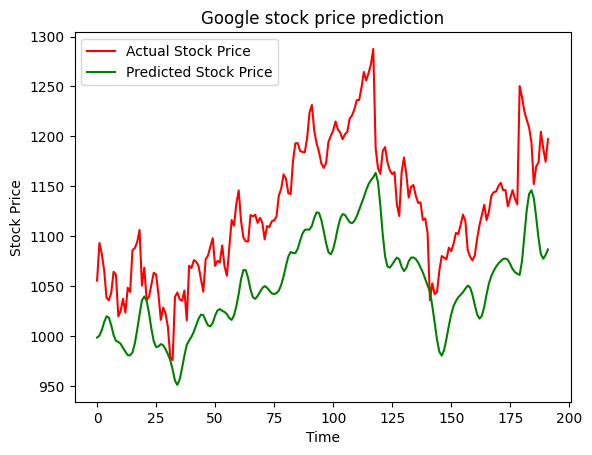

In [24]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()